# EP1 - Cálculo do Conjunto de Mandelbrot em Paralelo com Pthreads e OpenMP


|                Nome              |   NUSP   |
|----------------------------------|----------|
| Eduardo Freire de Carvalho Lima  | 10262627 |
| Kaique Kazuyoshi Komata          | 10297741 |
| Lucas Civile Nagamine            |  7083142 |
| Victor Hugo Miranda Pinto        | 10297720 |
| Yurick Yussuke Honda             | 10258984 |


Primeiramente, rodamos o comando na célula abaixo para instalar e atualizar os pacotes e dependências necessários para a execução dos scripts desse notebook:

In [3]:
] up

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Updating `~/Documents/College/EPs/MAC0219/EP1/src/Project.toml`
 [no changes]
   Updating `~/Documents/College/EPs/MAC0219/EP1/src/Manifest.toml`
 [no changes]


Depois, rodamos a célula abaixo para verificar os status dos pacotes e ver se há algum problema neles:

In [4]:
] st

Status `~/Documents/College/EPs/MAC0219/EP1/src/Project.toml`
  [336ed68f] CSV v0.6.2
  [a93c6f00] DataFrames v0.21.0


Após isso, entramos no modo shell para rodar o Makefile e compilar todos os scripts em C que calculam os Conjuntos de Mandelbrot:

In [6]:
; make all

gcc -o mandelbrot_pth -std=c11 -pthread mandelbrot_pth.c


Ainda no modo shell, rodamos o script <i>run_measurements.sh</i>, que executa todos os experimentos necessários e calcula  o tempo de execução com o comando <i>perf stat</i> do Linux:

In [4]:
; ./run_measurements.sh

make: Nothing to be done for 'all'.


+ MEASUREMENTS=10
+ ITERATIONS=4
+ INITIAL_SIZE=16
+ THREADS_ITERATIONS=6
+ INITIAL_THREADS=1
+ THREADS=1
+ SIZE=16
+ NAMES1=('mandelbrot_seq' 'mandelbrot_seq_sem')
+ NAMES2=('mandelbrot_pth' 'mandelbrot_omp')
+ make
+ mkdir results
+ for NAME in ${NAMES1[@]}
+ mkdir results/mandelbrot_seq
+ (( i=1 ))
+ (( i<=4 ))
+ perf stat -r 10 -n ./mandelbrot_seq -2.5 1.5 -2.0 2.0 16
+ perf stat -r 10 -n ./mandelbrot_seq -0.8 -0.7 0.05 0.15 16
+ perf stat -r 10 -n ./mandelbrot_seq 0.175 0.375 -0.1 0.1 16
+ perf stat -r 10 -n ./mandelbrot_seq -0.188 -0.012 0.554 0.754 16
+ SIZE=32
+ (( i++ ))
+ (( i<=4 ))
+ perf stat -r 10 -n ./mandelbrot_seq -2.5 1.5 -2.0 2.0 32
+ perf stat -r 10 -n ./mandelbrot_seq -0.8 -0.7 0.05 0.15 32
+ perf stat -r 10 -n ./mandelbrot_seq 0.175 0.375 -0.1 0.1 32
+ perf stat -r 10 -n ./mandelbrot_seq -0.188 -0.012 0.554 0.754 32
+ SIZE=64
+ (( i++ ))
+ (( i<=4 ))
+ perf stat -r 10 -n ./mandelbrot_seq -2.5 1.5 -2.0 2.0 64
+ perf stat -r 10 -n ./mandelbrot_seq -0.8 -0.7 0.05 0.15

+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 64 8
+ THREADS=16
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 64 16
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 64 16
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 64 16
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 64 16
+ THREADS=32
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 64 32
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 64 32
+ perf stat -r 10 -n ./mandelbrot_pth 0.175 0.375 -0.1 0.1 64 32
+ perf stat -r 10 -n ./mandelbrot_pth -0.188 -0.012 0.554 0.754 64 32
+ THREADS=64
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ THREADS=1
+ SIZE=128
+ (( i++ ))
+ (( i<=4 ))
+ (( j=1 ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_pth -2.5 1.5 -2.0 2.0 128 1
+ perf stat -r 10 -n ./mandelbrot_pth -0.8 -0.7 0.05 0.15 128 1
+ perf stat -r 10 -n ./mande

+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 64 16
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 64 16
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 64 16
+ THREADS=32
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 64 32
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 64 32
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 64 32
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 64 32
+ THREADS=64
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ THREADS=1
+ SIZE=128
+ (( i++ ))
+ (( i<=4 ))
+ (( j=1 ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./mandelbrot_omp -2.5 1.5 -2.0 2.0 128 1
+ perf stat -r 10 -n ./mandelbrot_omp -0.8 -0.7 0.05 0.15 128 1
+ perf stat -r 10 -n ./mandelbrot_omp 0.175 0.375 -0.1 0.1 128 1
+ perf stat -r 10 -n ./mandelbrot_omp -0.188 -0.012 0.554 0.754 128 1
+ THREADS=2
+ (( j++ ))
+ (( j<=THREADS_ITERATIONS ))
+ perf stat -r 10 -n ./ma

O script <i>run_measurements</i> criará pastas com arquivos log que contém os resultados dos experimentos. Para podermos analisar esses resultados e produzir gráficos, executamos o código da célula abaixo para ler os arquivos log, extrair as informações que queremos e criar um DataFrame a partir delas.

In [52]:
using DataFrames

regions = ["full", "elephant", "seahorse", "triple_spiral"]
scripts1 = ["mandelbrot_seq", "mandelbrot_seq_sem"]
scripts2 = ["mandelbrot_pth", "mandelbrot_omp"]
scriptColumn = []
regionColumn = []
imgColumn = []
meanColumn = Float64[]
devColumn = Float64[]
threadsColumn = []
for region in regions
    log = "$(region).log"
    for s in scripts1
        open("results/$s/$log") do file
            for ln in eachline(file)                   
                if occursin("./", ln)
                    push!(scriptColumn, s)
                    push!(regionColumn, region)
                    commands = split(ln, " ")
                    push!(imgColumn, chop(commands[11]))
                end
                if occursin("+-", ln)
                    result = split(ln, " ")
                    mean = replace(result[8], "," => ".")
                    mean = parse.(Float64, mean)
                    push!(meanColumn, mean)
                    if result[56] == ")"
                        dev = replace(chop(result[55]), "," => ".")
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        push!(devColumn, dev)
                    else
                        dev = replace(chop(result[56]), "," => ".")
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        push!(devColumn, dev)
                    end
                    push!(threadsColumn, ".")
                end
            end
        end
    end
    
    for s in scripts2
        open("results/$s/$log") do file
            for ln in eachline(file)
                if occursin("./", ln)
                    push!(scriptColumn, s)
                    push!(regionColumn, region)
                    commands = split(ln, " ")
                    push!(imgColumn, commands[11])
                    thread = parse.(Int64, chop(commands[12]))
                    push!(threadsColumn, thread)
                end
                if occursin("+-", ln)
                    result = split(ln, " ")
                    mean = replace(result[8], "," => ".")
                    mean = parse.(Float64, mean)
                    push!(meanColumn, mean)
                    if result[56] == ")"
                        dev = replace(chop(result[55]), "," => ".")
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        push!(devColumn, dev)
                    else
                        dev = replace(chop(result[56]), "," => ".")                    
                        dev = parse.(Float64, dev)
                        dev = dev / 100 * mean
                        push!(devColumn, dev)
                    end
                end
            end
        end
    end
end

columns = [scriptColumn, regionColumn, imgColumn, threadsColumn, meanColumn, devColumn];
df = DataFrame(columns, [:script, :region, :img_size, :threads, :mean, :stddev])

,script,region,img_size,threads,mean,stddev
,Any,Any,Any,Any,Any,Any
1,mandelbrot_seq,full,16,.,0.000778102,3.89829e-5
2,mandelbrot_seq,full,32,.,0.000843151,3.33888e-5
3,mandelbrot_seq,full,64,.,0.00162051,4.48882e-5
4,mandelbrot_seq,full,128,.,0.00471411,0.000179136
5,mandelbrot_seq_sem,full,16,.,0.000509168,2.90226e-5
6,mandelbrot_seq_sem,full,32,.,0.000699296,5.18178e-5
7,mandelbrot_seq_sem,full,64,.,0.00120307,4.7762e-5
8,mandelbrot_seq_sem,full,128,.,0.00344569,5.13408e-5
9,mandelbrot_pth,full,16,1,0.000842316,2.10579e-5


Também podemos salvar o DataFrame construído com os resultados num arquivo CSV <i>results.csv</i> executando a célula abaixo.

In [50]:
using CSV

CSV.write("results.csv", df)

"results.csv"

In [64]:
using Plots
function plot_results(data)
    threads = [1, 2, 4, 8, 16, 32]
   
    d1 = data[data[!, :threads] .== 1, :]
    d2 = data[data[!, :threads] .== 2, :]
    d4 = data[data[!, :threads] .== 4, :]
    d8 = data[data[!, :threads] .== 8, :]
    d16 = data[data[!, :threads] .== 16, :]
       
       
    scatter(
        d1.img_size[1:size(d1, 1)],
        d1.mean[1:size(d1, 1)],
        yerror = d1.stddev[1:size(d1, 1)],
        color = "red",
        labels = "1",
        xlabel = "Tamanho da Imagem",
        ylabel = "Tempo de execução (s)"
    )
end

plot_results (generic function with 1 method)

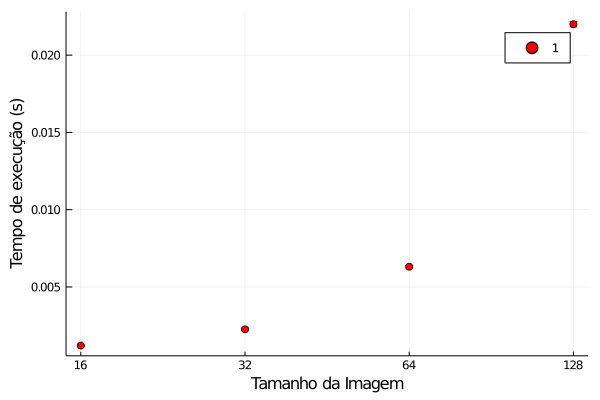

In [65]:
pth = df[df[!, :script] .== "mandelbrot_pth", :]
seahorse = pth[pth[!, :region] .== "seahorse", :]
plot_results(seahorse)